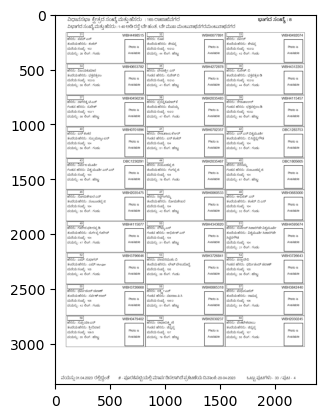

In [1]:
import cv2
import matplotlib.pyplot as plt
import keras_ocr 
file=r"C:\Users\shiva\Downloads\shivam_anaconda\pdf_extraction\data_folder_kan\_3_.png"
img = cv2.imread(file,0)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

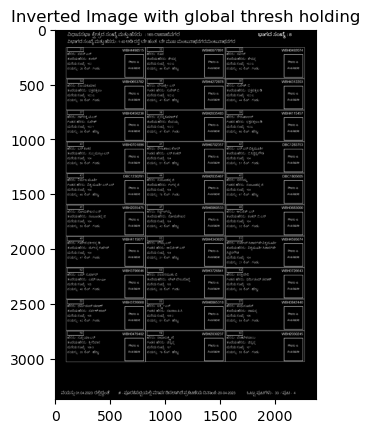

In [3]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

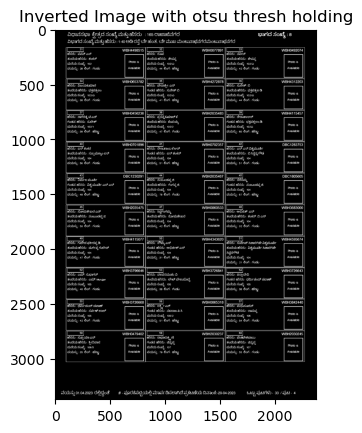

In [4]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

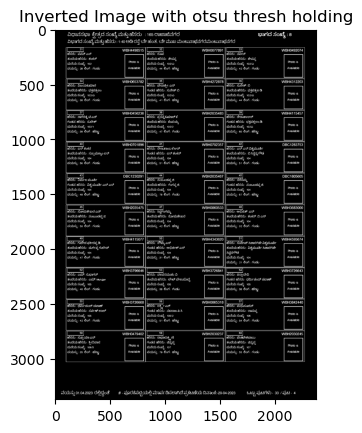

In [5]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [6]:
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
# print(kernel)

# img_bin_otsu = cv2.dilate(img_bin_otsu, kernel, iterations=3)

# plotting = plt.imshow(img_bin_otsu,cmap='gray')
# plt.title("Inverted Image with otsu thresh holding")
# plt.show()

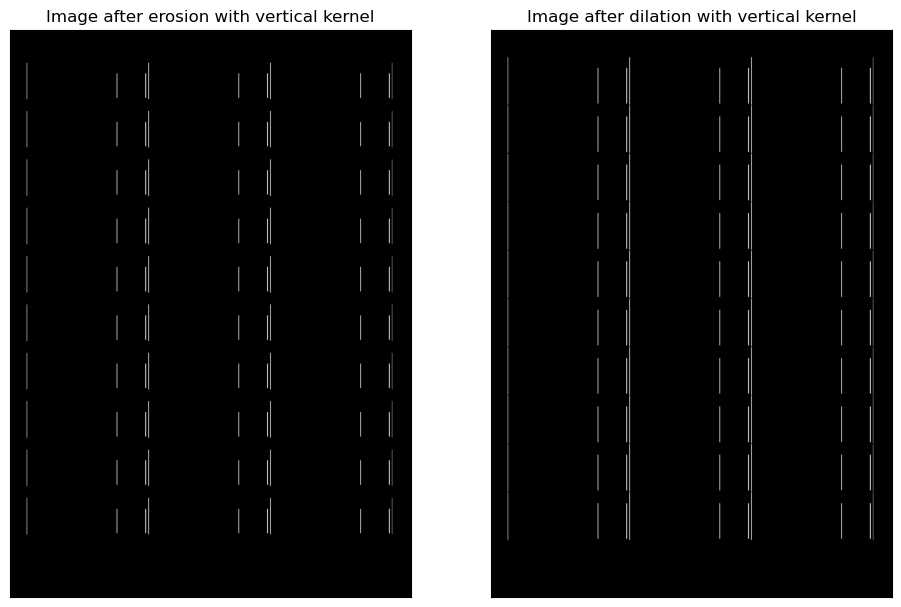

In [7]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

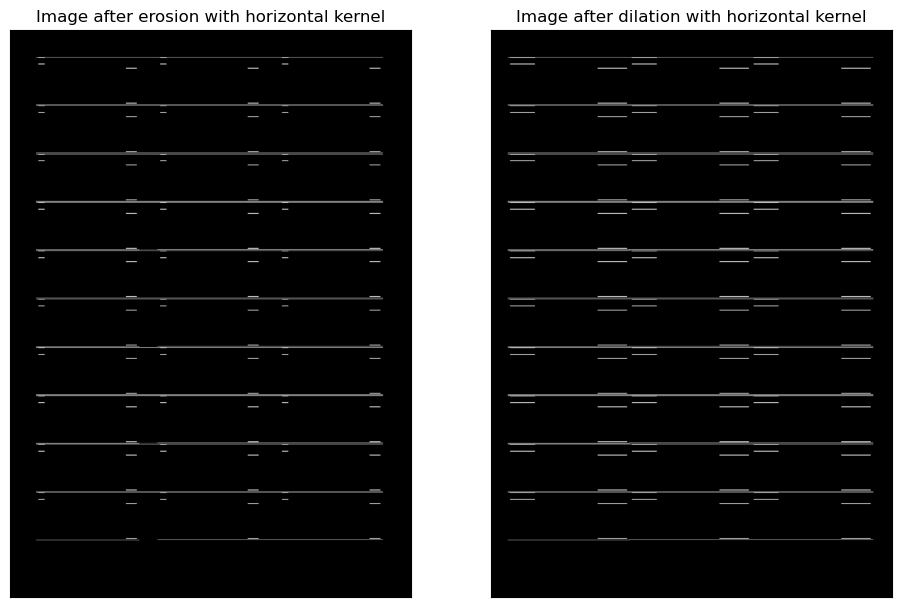

In [9]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin_otsu, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

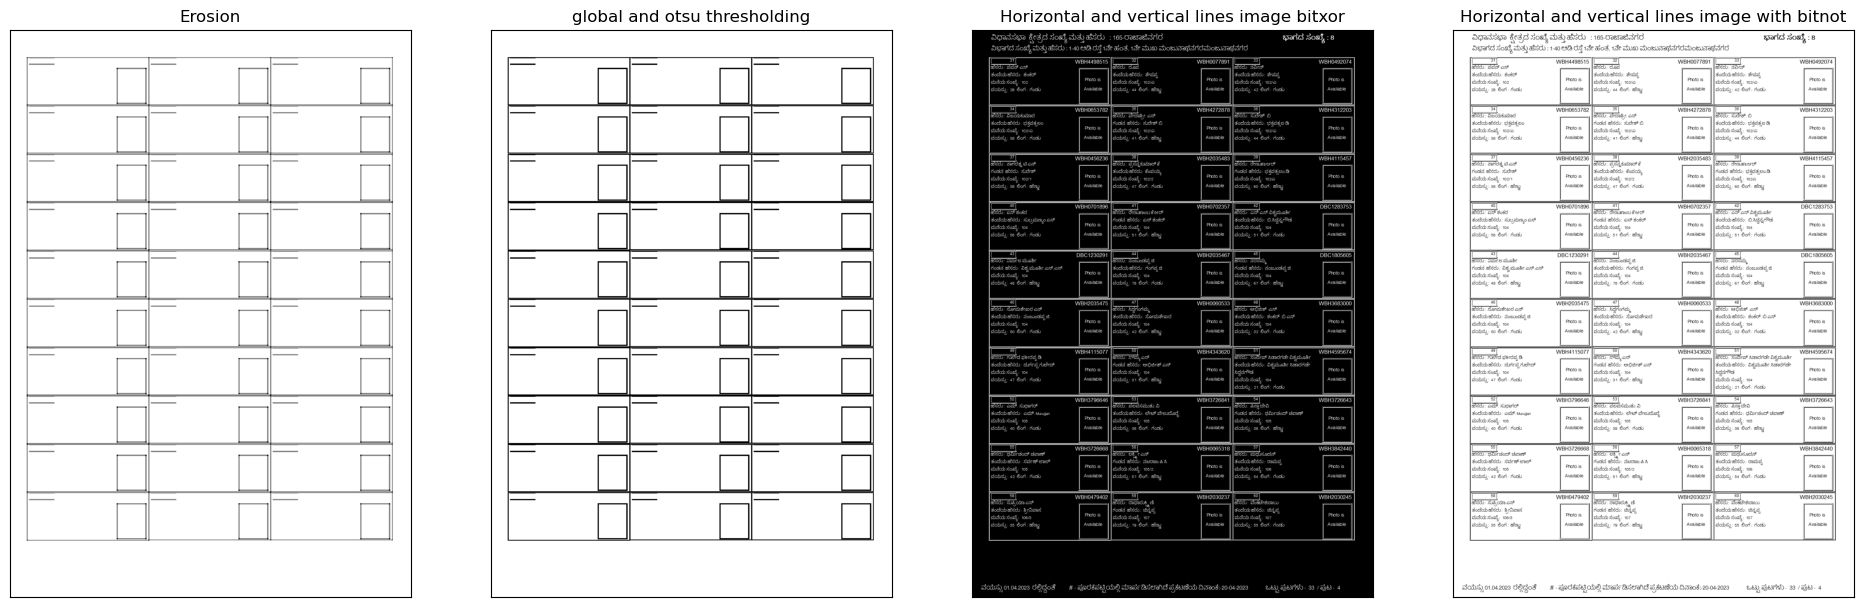

In [10]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
import pytesseract

In [12]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

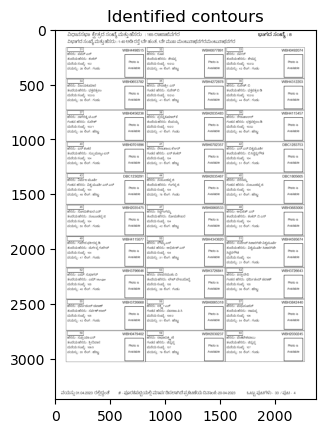

In [14]:
plotting = plt.imshow(img,cmap='gray')
plt.title("Identified contours")
plt.show()

In [15]:
img_new = img.copy()
img_safe = img.copy()

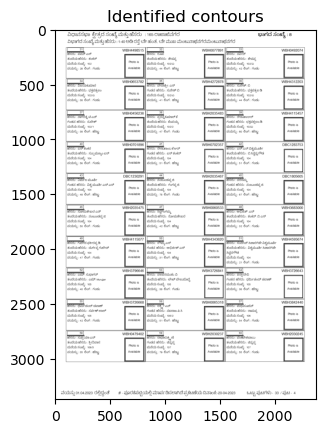

In [16]:
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w*h>1000 and w*h<50000):
    image = cv2.rectangle(img_new,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [17]:
print(len(boxes))

86


In [18]:
for i in boxes:
    img_safe[i[1]:i[1]+i[3],i[0]:i[0]+i[2]] = 255

            

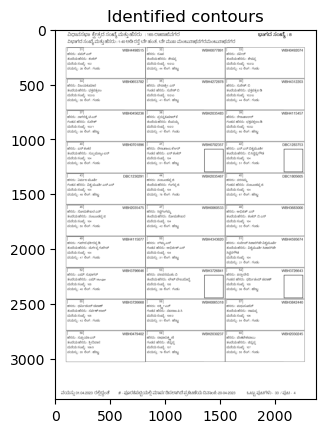

In [19]:
plotting = plt.imshow(img_safe,cmap='gray')
plt.title("Identified contours")
plt.show()

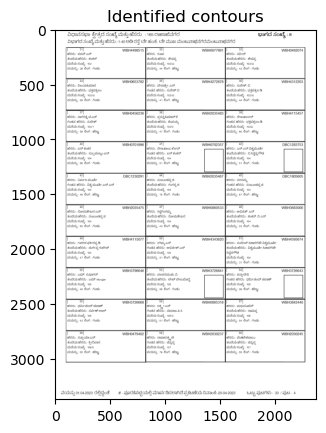

In [20]:
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w*h>50000 and w<1000 and h<1000):
    image = cv2.rectangle(img_safe,(x-5,y-5),(x+w+5,y+h+5),(0,255,0),2)
    boxes.append([x-5,y-5,w+5,h+5])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [21]:
print(len(boxes))

30


In [22]:
# def find_text():
#     pipeline = keras_ocr.pipeline.Pipeline()
#     images = [
#         cv2.imread('testing.png')
#     ]
#     prediction_groups = pipeline.recognize(images)
#     new_boxes = []
#     y_thresh = 15
#     x_thresh = 15

#     mapping_dict_x = {}
#     mapping_dict_y = {}

#     p_x = 0
#     p_y = 0
#     sorted_x = sorted(prediction_groups[0],key=lambda x:x[1][0][0])
#     sorted_y = sorted(prediction_groups[0],key=lambda x:x[1][0][1])    
#     for i in sorted_x:
#         x = i[1][0][0]
#         flag = 0
#         for j in mapping_dict_x.keys():
#             if abs(x-j)<=x_thresh:
#                 p_x = mapping_dict_x[j]
#                 mapping_dict_x[x] = p_x
#                 flag=1
#                 break
#         if flag==0:
#             mapping_dict_x[x] = p_x
#             p_x+=1

#     for i in sorted_y:        
#         y = i[1][0][1]
#         flag = 0
#         for j in mapping_dict_y.keys():
#             if abs(y-j)<=y_thresh:
#                 p_y = mapping_dict_y[j]
#                 mapping_dict_y[y] = p_y
#                 flag=1
#                 break
#         if flag==0:
#             mapping_dict_y[y] = p_y
#             p_y+=1

#     new_box = []
#     for i in prediction_groups[0]:
#         new_box.append([i[0],[mapping_dict_x[i[1][0][0]],mapping_dict_y[i[1][0][1]]]])
#     new_box = sorted(new_box,key=lambda x:x[1][0])
#     new_box = sorted(new_box,key=lambda x:x[1][1])
#     print(new_box)
#     new_box_f = new_box[1:]
#     dict_temp = {}
#     dict_temp['id'] = new_box_f[0][0]
#     dict_temp['name'] = new_box_f[2][0]
#     dict_temp['fathers name'] = new_box[8][0]
#     dict_temp['house_number'] = new_box[12][0]
#     dict_temp['age'] = new_box[15][0]
#     dict_temp['gender'] = new_box[18][0]
#     return dict_temp

In [23]:
def find_text():
    text = pytesseract.image_to_string(cv2.imread(r"testing.png"),lang='kan')
    a = text.split("\n")
    print(a)
#     dict1 = {}
#     last_e = ''
#     for i in a:
#         j = i.strip()
#         k = j.lower()
#         flag=0
#         if 'W' in j or 'B' in j:
#             dict1['id'] = j[j.find('WB'):].strip()
#             flag=1
#             last_e = 'id'
#         if 'name' in k and k[0] == 'n':
#             dict1['name'] = k[k.find('name')+6:].strip()
#             flag=1
#             last_e = 'name'
#         if 'father' in k:
#             dict1['father_name'] = k[k.find('father')+15:].strip()
#             flag=1
#             last_e = 'father_name'
#         if 'husband' in k:
#             dict1['husband_name'] = k[k.find('husband')+16:].strip()
#             flag=1
#             last_e = 'husband_name'
#         if 'house' in k:
#             dict1['house_number'] = k[k.find('house')+14:].strip()
#             flag=1
#             last_e = 'house_number'
#         if 'age' in k:
#             dict1['age'] = k[k.find('age')+5:k.find('gender')-1].strip()
#             flag=1
#             last_e = 'age'
#         if 'gender' in k:
#             dict1['gender'] = k[k.find('gender')+8:]
#             flag=1
#             last_e = 'house_number'
#         if flag==0 and len(j)>0:
#             dict1[last_e] += f' {j}'
#     return dict1

In [29]:
from AksharaJaana.main import OCREngine
from AksharaJaana.utils import ModelTypes, FileOperationUtils

ocr = OCREngine(modelType=ModelTypes.Tesseract)
# choices are Paddleocr, Easyocr, Tesseract

# text = ocr.get_text_from_file("Your file Path") 
# print(text) 

ModuleNotFoundError: No module named 'paddleocr'

In [ ]:
for i in boxes:
    x,y,w,h = i
    roi = img_safe[y:y+h,x:x+w,]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
    border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
    resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    dilation = cv2.dilate(resizing, kernel,iterations=1)
    erosion = cv2.erode(dilation, kernel,iterations=2) 
    erosion = cv2.resize(erosion,(0,0),fx=5,fy=5)
    cv2.imwrite('testing.png',erosion)
    find_text()
#     _,otsu_erosion = cv2.threshold(erosion,180,255,cv2.THRESH_BINARY)
#     cv2.imwrite('testing.png',erosion)
#     out = pytesseract.image_to_string(roi, lang='eng',config='--psm 7')
#     print(out)
#     break


In [ ]:
# look for better ocr, executable with app

In [ ]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
print("Rows")
for row in rows:
  print(row)
     

In [ ]:
total_cells=0
for i in range(len(row)):
  if len(row[i]) > total_cells:
    total_cells = len(row[i])
print(total_cells)

In [ ]:
print(len(boxes))

In [ ]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)

In [ ]:
center=np.array(center)
center.sort()
print(center)

In [ ]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
  print(box)

In [ ]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
print(dataframe_final)